In [4]:
!pip install hvplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 1.2 MB/s eta 0:00:00


In [6]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_csv('/content/loan.csv')
df.head()


<ipython-input-6-4859e9fccd51>:7: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# Get the no of records and column
print(f"Number of Records : {df.shape[0]} Number of Features : {df.shape[1]}")

Number of Records : 39717 Number of Features : 111


In [8]:
#what are the data type, How many are of Object type ??
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:
#Checking for Null and NA Values
df.isna().any()

,0
id,False
member_id,False
loan_amnt,False
funded_amnt,False
funded_amnt_inv,False
...,...
tax_liens,True
tot_hi_cred_lim,True
total_bal_ex_mort,True
total_bc_limit,True


<Axes: >

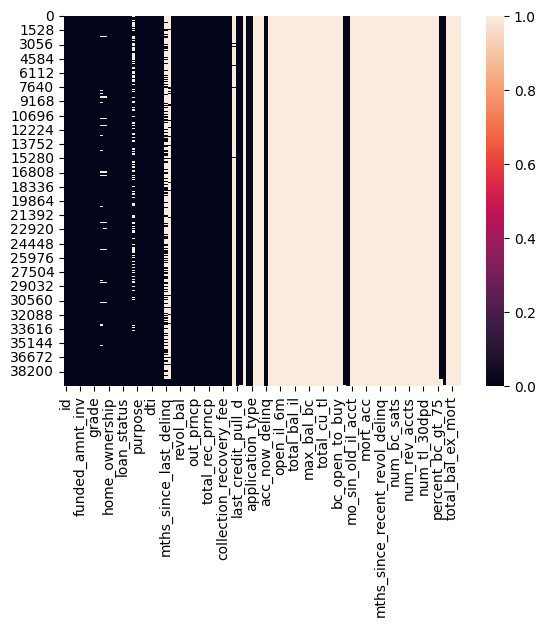

In [10]:
sns.heatmap(df.isna())

In [ ]:
#Observations: At the end of the files there are multiple columns which are having Null/NA Values

In [11]:
df.dropna(axis=1,how='all',inplace=True)
df.isna().any()

,0
id,False
member_id,False
loan_amnt,False
funded_amnt,False
funded_amnt_inv,False
term,False
int_rate,False
installment,False
grade,False
sub_grade,False


In [12]:
# Get the no of records and column
print(f"Number of Records : {df.shape[0]} Number of Features : {df.shape[1]}")

Number of Records : 39717 Number of Features : 57


In [13]:
# 54 columns with all null values are removed. There is no row with all null values

In [14]:
missing_values = pd.DataFrame({'Count':df.isna().sum(),'Percentage':(df.isna().sum()/len(df))*100})
# Identify columns with more than 75% null values
drop_cols = missing_values[missing_values['Percentage']>75.0].index
# Drop these columns from the original DataFrame
df.drop(drop_cols, axis=1, inplace=True)



In [15]:
missing_values = pd.DataFrame({'Count':df.isna().sum(),'Percentage':(df.isna().sum()/len(df))*100})

missing_values.style.background_gradient(cmap='coolwarm')

,Count,Percentage
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [16]:
# Get the no of records and column
print(f"Number of Records : {df.shape[0]} Number of Features : {df.shape[1]}")

Number of Records : 39717 Number of Features : 55


<Axes: >

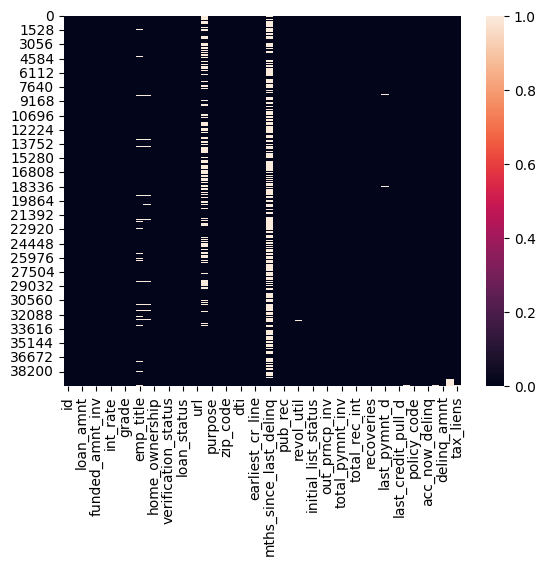

In [17]:
sns.heatmap(df.isna())

In [18]:
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(), inplace=True)

<Axes: >

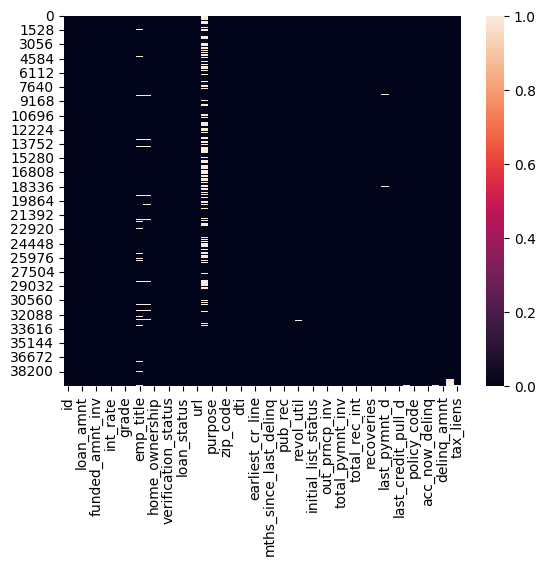

In [19]:
sns.heatmap(df.isna())


In [20]:
#URL field is not Useful lets remove it
df.drop(['url'],axis=1,inplace=True)

<Axes: >

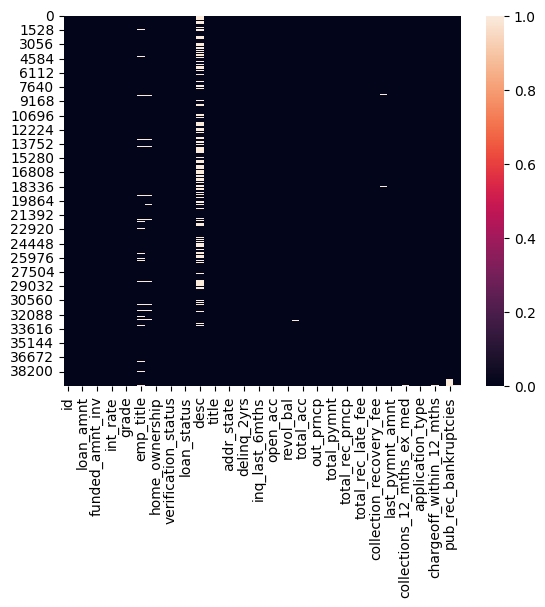

In [21]:
sns.heatmap(df.isna())

In [22]:
print(f"Number of Records : {df.shape[0]} Number of Features : {df.shape[1]}")

Number of Records : 39717 Number of Features : 54


In [23]:
df.dtypes


,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object


In [24]:
#Remove % from int_rate and convert the type to Float
df.int_rate=df.int_rate.str.replace("%","").astype(float)


In [25]:
df.dtypes


,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,float64
installment,float64
grade,object
sub_grade,object


In [26]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [27]:
# Remove Months from the term field and convert it fron Object to Integer

In [28]:
df.term.value_counts()


,count
term,
36 months,29096
60 months,10621


In [29]:

df['term'] = df.term.apply(lambda x: x.split()[0])

In [30]:
df.term.value_counts()

,count
term,
36,29096
60,10621


In [31]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


<ipython-input-32-6d79063cdd83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['emp_length'],palette='inferno')


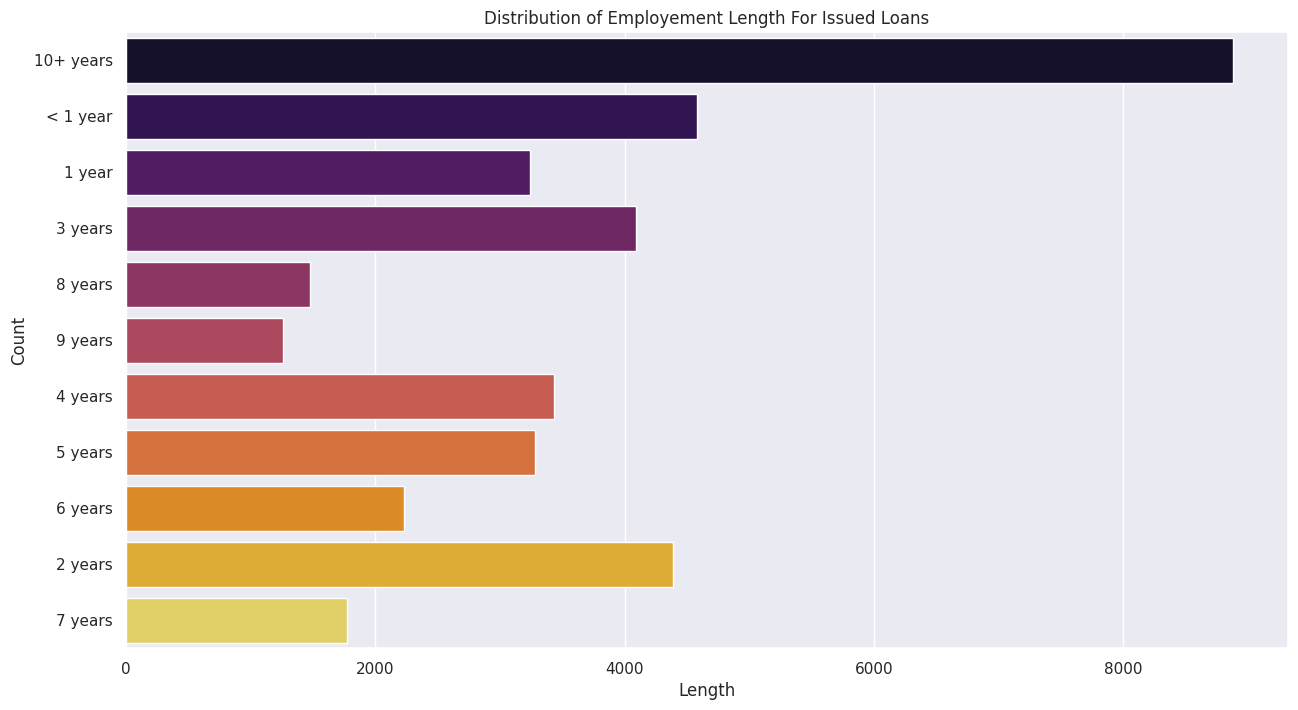

In [32]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df['emp_length'],palette='inferno')
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Distribution of Employement Length For Issued Loans")
plt.show()

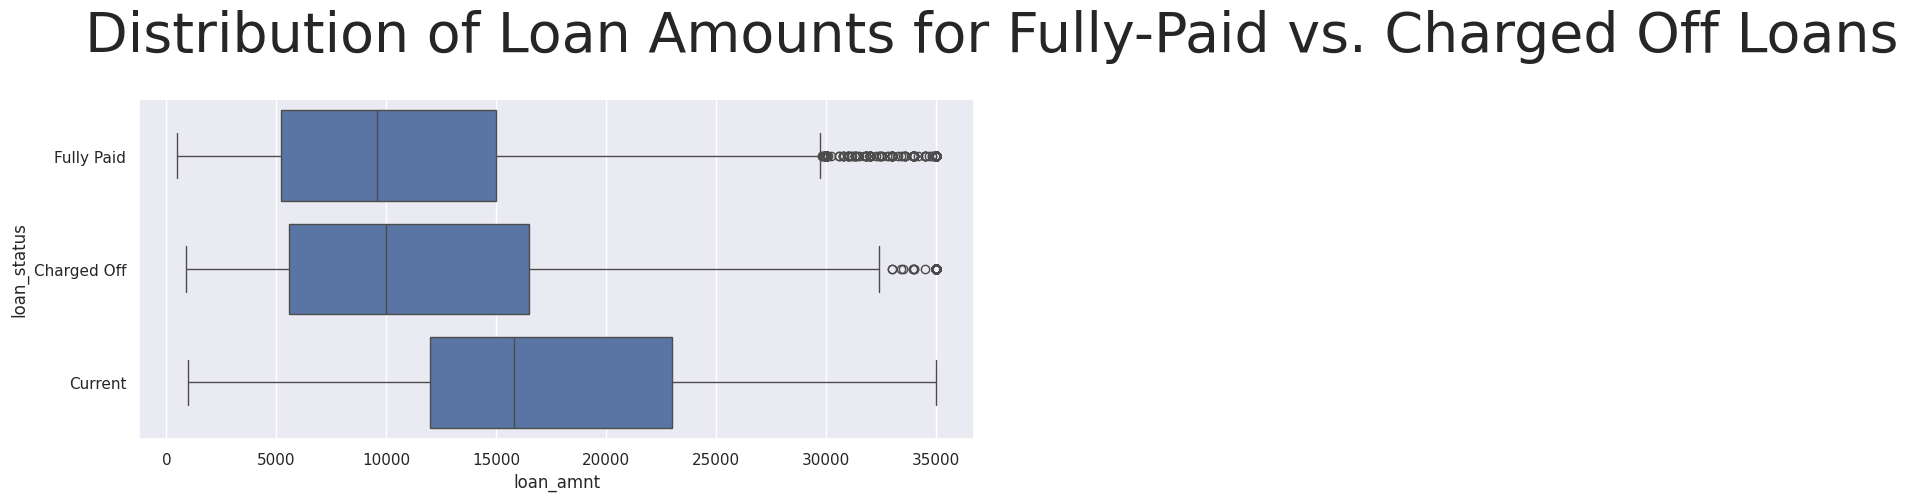

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Handle potential missing values:
df.dropna(subset=["loan_amnt", "loan_status"], inplace=True)

# Ensure 'loan_status' is of type string (categorical):
df['loan_status'] = df['loan_status'].astype(str)

plt.subplots(figsize=(10,5))
plt.suptitle("Distribution of Loan Amounts for Fully-Paid vs. Charged Off Loans", x=1, y=1).set_size(40)
sns.boxplot(x="loan_amnt", y="loan_status", data=df )
plt.tight_layout()
plt.show()

<Axes: xlabel='loan_amnt', ylabel='loan_status'>

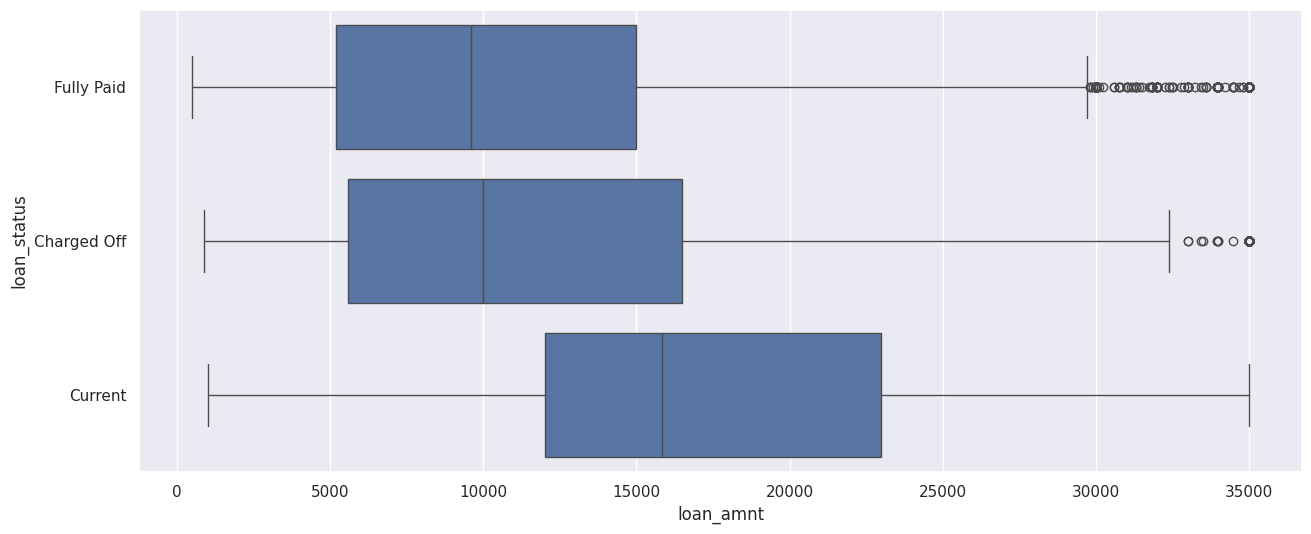

In [34]:
df['loan_status'] = df['loan_status'].astype("string")
df['grade'] = df['grade'].astype("string")
sns.set(rc={'figure.figsize':(15,6)})
sns.boxplot(x='loan_amnt', y='loan_status', data=df)

In [35]:
df.dtypes




,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,float64
installment,float64
grade,string[python]
sub_grade,object


<ipython-input-36-9a8ce74658bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['grade'], palette='inferno')


<Axes: xlabel='count', ylabel='grade'>

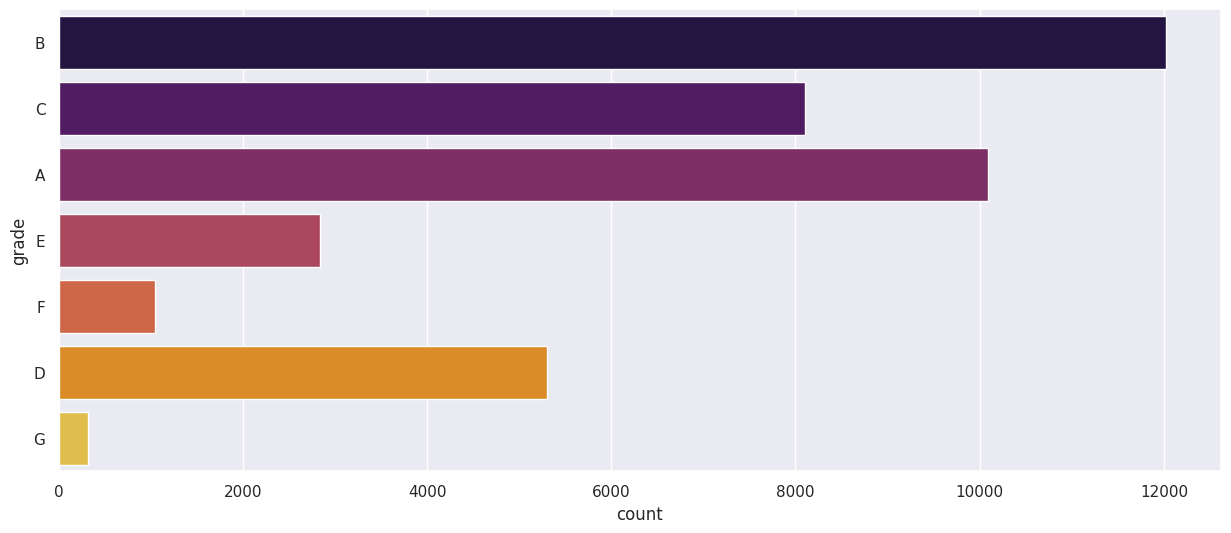

In [36]:
sns.set(rc={'figure.figsize':(15,6)})
sns.countplot(df['grade'], palette='inferno')

<Axes: xlabel='home_ownership', ylabel='count'>

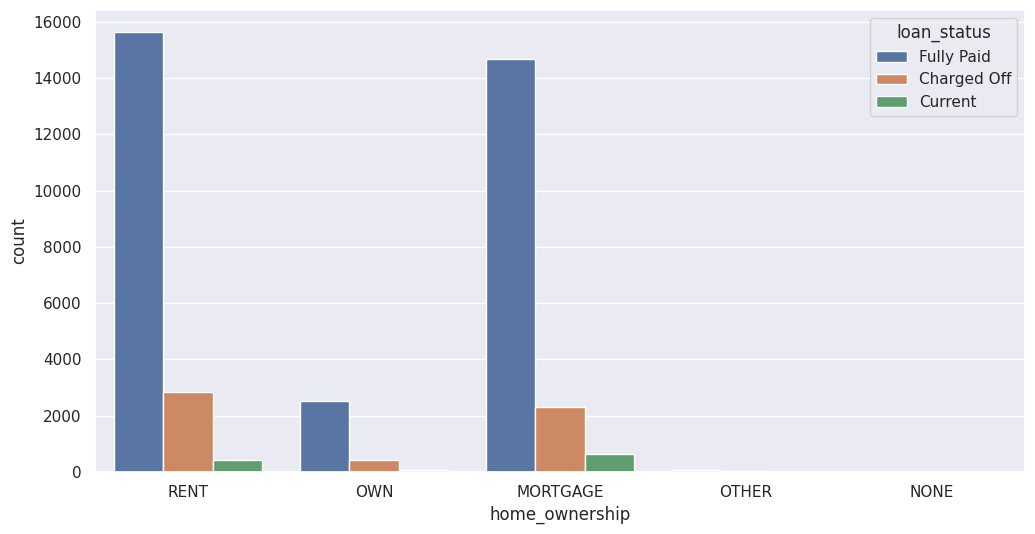

In [37]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'home_ownership', hue = 'loan_status', data = df)

<Axes: xlabel='term', ylabel='count'>

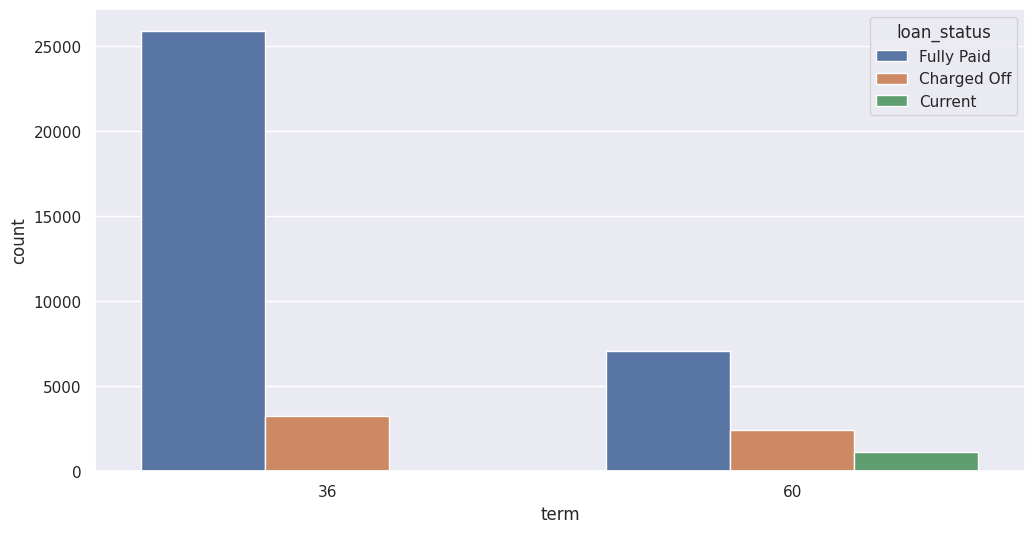

In [38]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'term', hue = 'loan_status', data = df)

<Axes: xlabel='emp_length', ylabel='count'>

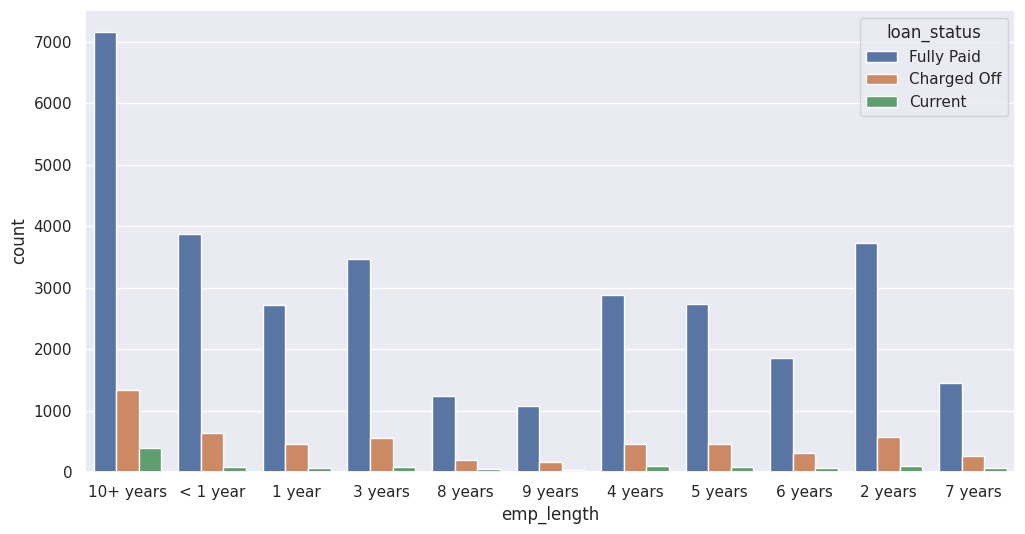

In [39]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'emp_length', hue = 'loan_status', data = df)

<Axes: xlabel='dti_lt_10', ylabel='count'>

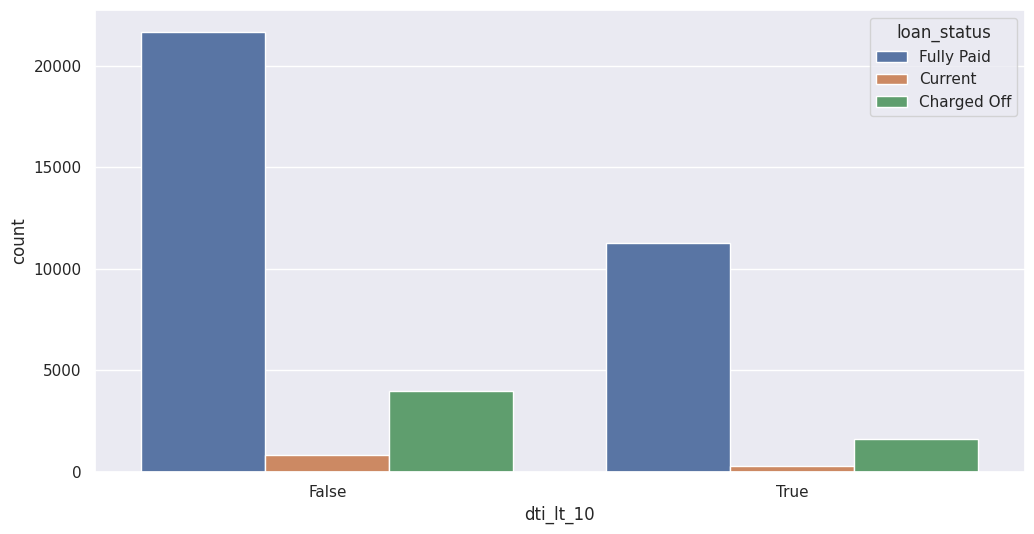

In [41]:
df['dti_lt_10'] = df['dti'] < 10
plt.figure(figsize = (12,6))
sns.countplot(x = 'dti_lt_10', hue = 'loan_status', data = df)

<ipython-input-42-35b283ad4f1d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(state_default, order=state_default.value_counts().index, palette='viridis')


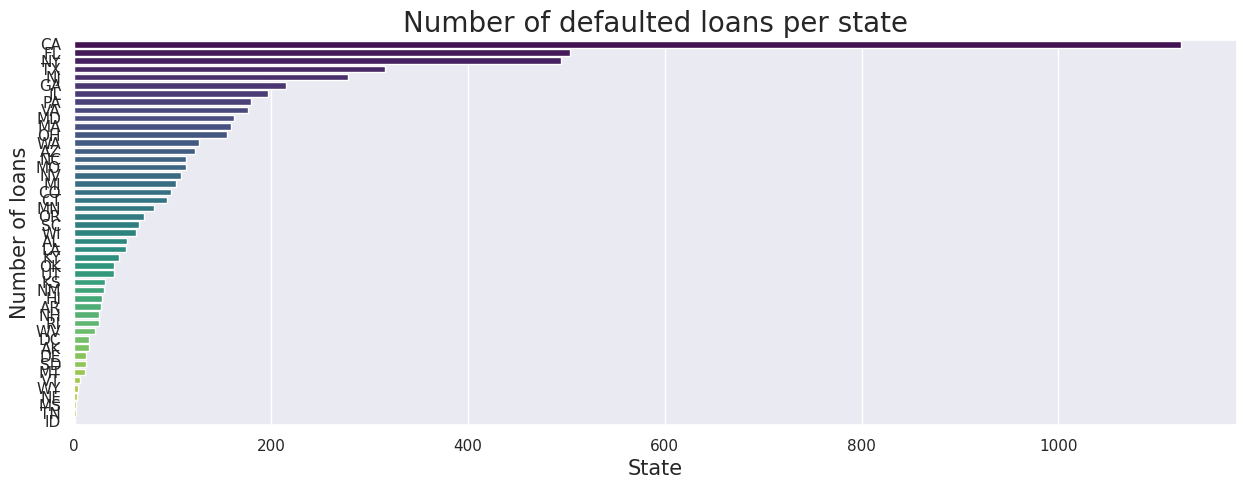

In [42]:
state_default = df[df['loan_status']=='Charged Off']['addr_state']

sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(state_default, order=state_default.value_counts().index, palette='viridis')
plt.xlabel('State',fontsize=15)
plt.ylabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

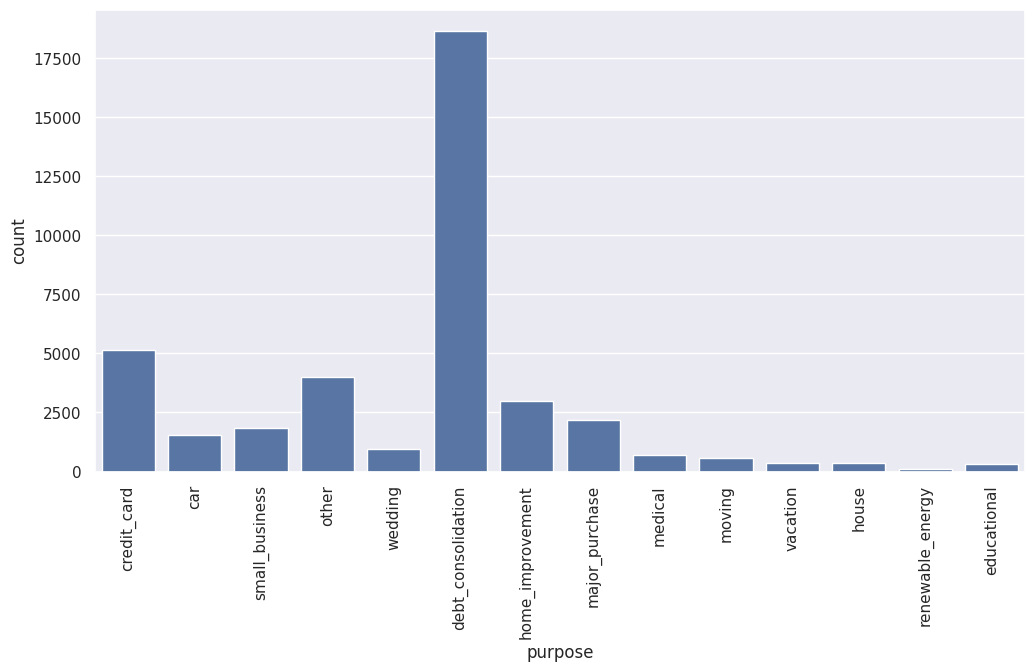

In [43]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'purpose', data = df)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'OWN'),
  Text(2, 0, 'MORTGAGE'),
  Text(3, 0, 'OTHER'),
  Text(4, 0, 'NONE')])

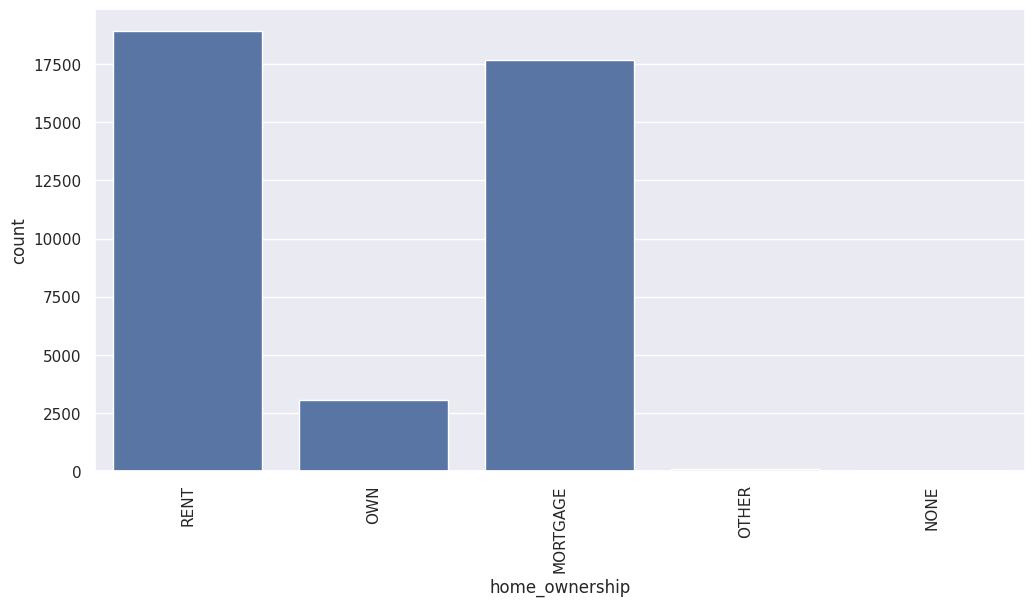

In [44]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'home_ownership', data = df)
plt.xticks(rotation = 90)

<Axes: xlabel='home_ownership', ylabel='count'>

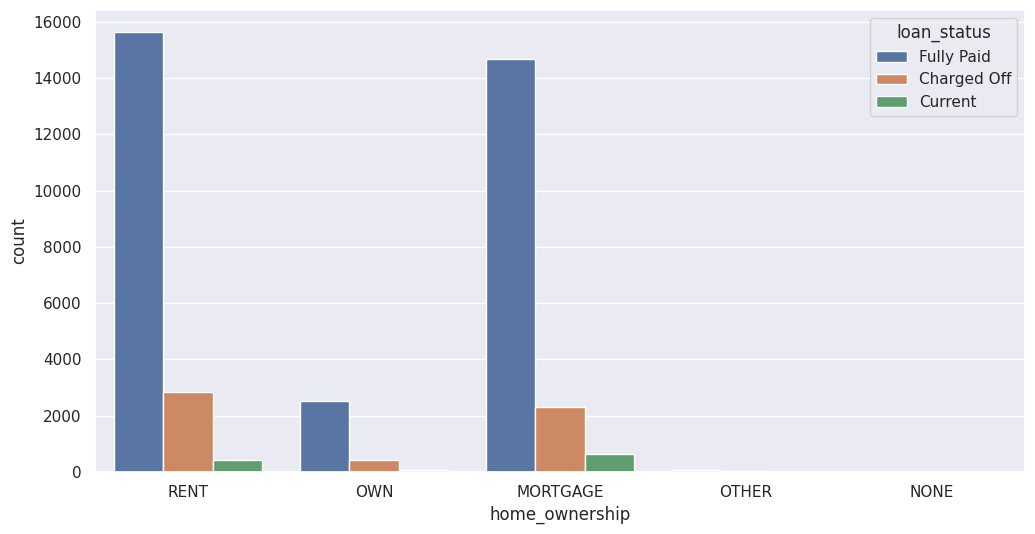

In [45]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'home_ownership', hue = 'loan_status', data = df)

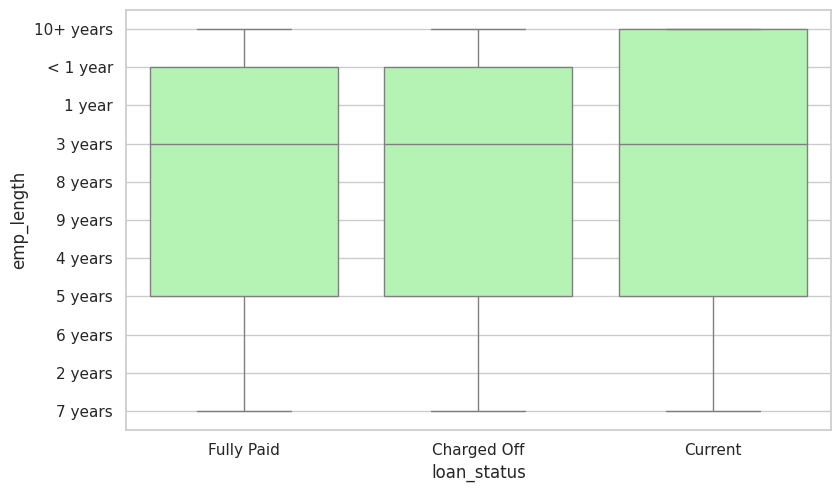

In [46]:
# Higher the loan amount higher is the chance of Charged off
colors = ["#a9fea9","#fca9a9"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
by = 'loan_status'
order = ['Fully Paid','Charged Off']
# loan_status_pct from above will be used in the below functions as well
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'emp_length', data = df)
plt.show()

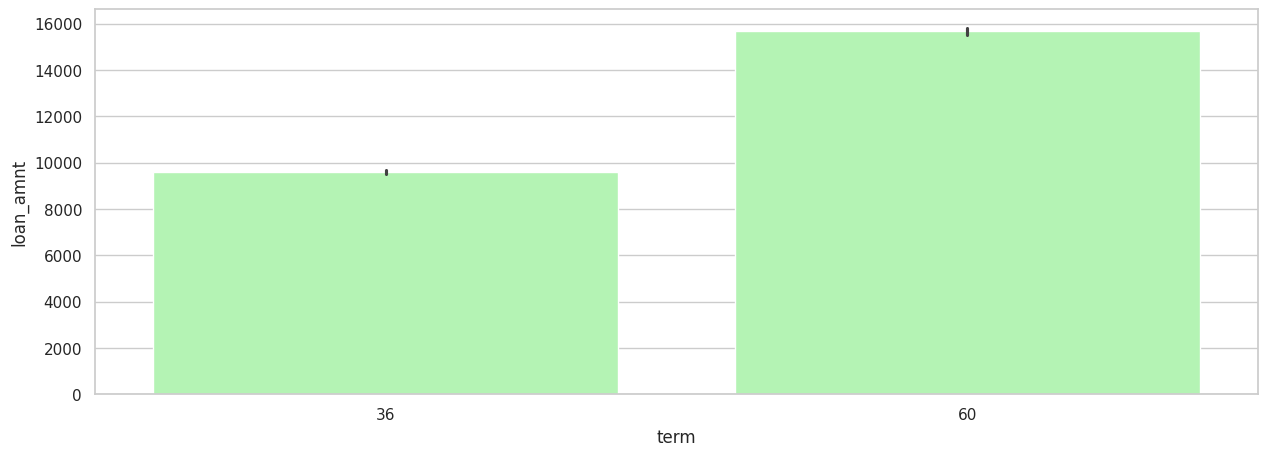

In [47]:
#The people with 60 month term period were the most charged_off ones on the basis of loan_amnt
sns.barplot(x='term',y='loan_amnt',data=df)
plt.show()

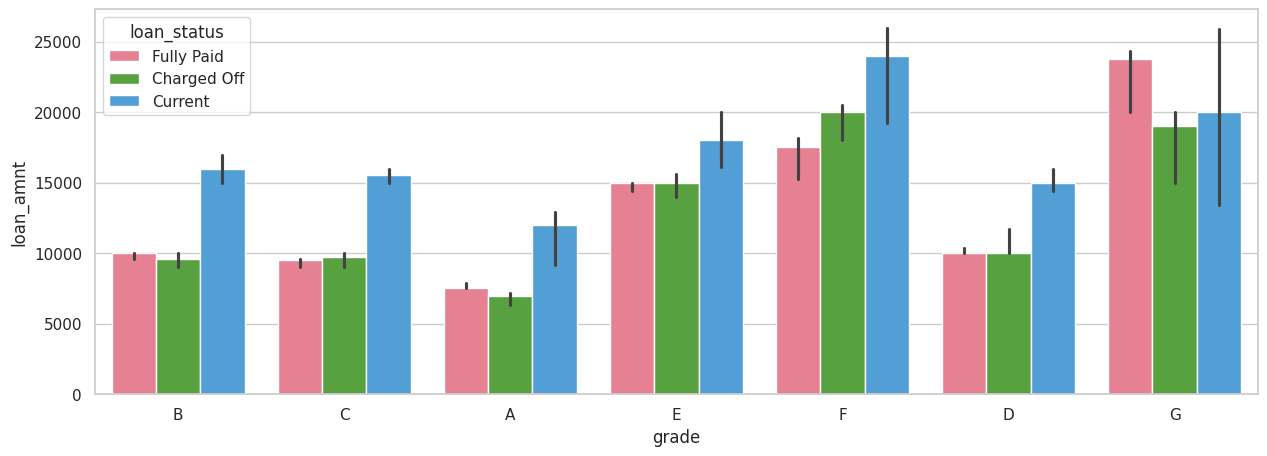

In [48]:
#loan_amnt vs grade vs loan_status
sns.barplot(x='grade', y='loan_amnt', hue="loan_status", data=df,estimator= np.median)

plt.show()

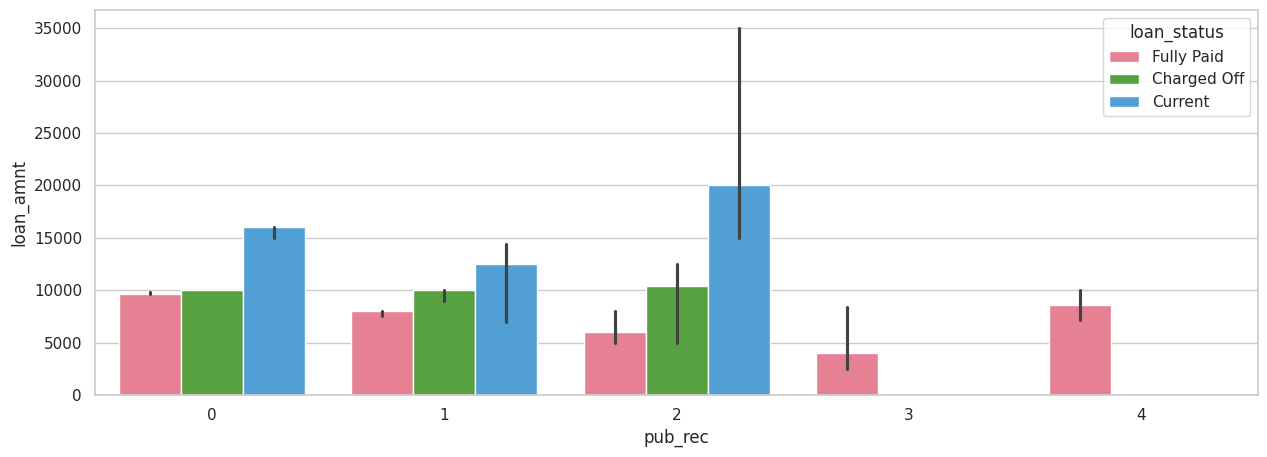

In [49]:
#loan_amnt vs Pub_rec vs loan_status
sns.barplot(x='pub_rec', y='loan_amnt', hue="loan_status", data=df,estimator= np.median)
plt.show()

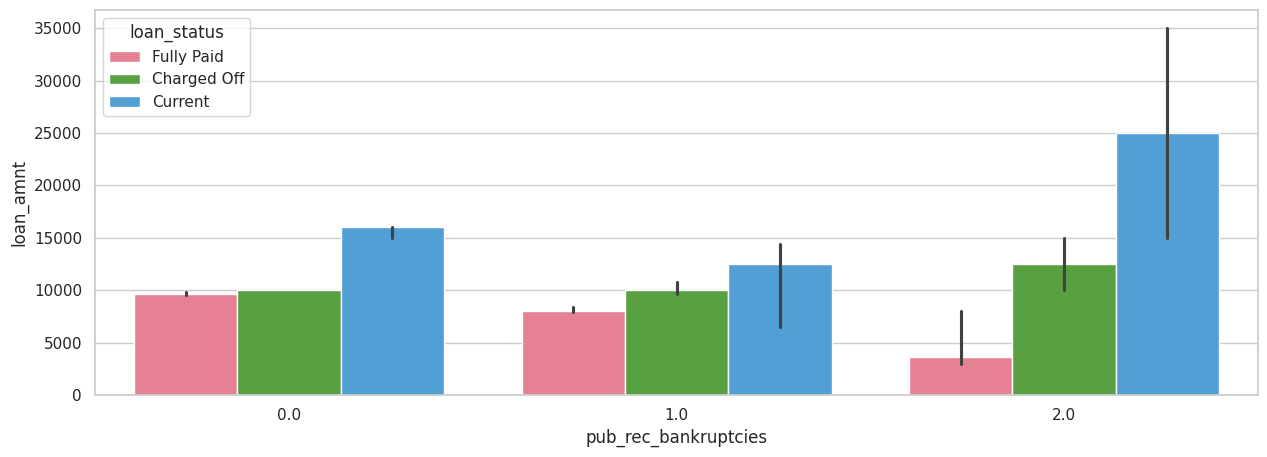

In [50]:
#loan_amnt vs pub_rec_bankruptcies vs loan_status
sns.barplot(x='pub_rec_bankruptcies', y='loan_amnt', hue="loan_status", data=df,estimator= np.median)
plt.show()

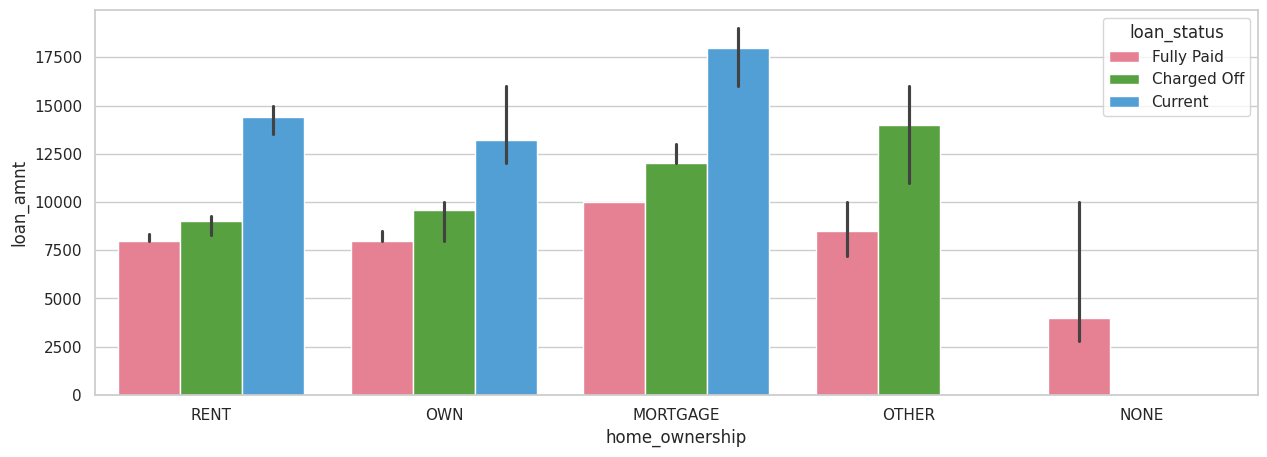

In [51]:
#loan_amnt vs home_ownership vs loan_status
sns.barplot(x='home_ownership', y='loan_amnt', hue="loan_status", data=df,estimator= np.median)

plt.show()

In [52]:
#Creating buckets for dti for analysis
df['dti_buckets'] = pd.cut(df['dti'], [0,5,10,15,20,25,30],['0-5','5-10','10-15','15-20','20-25','25-30'])

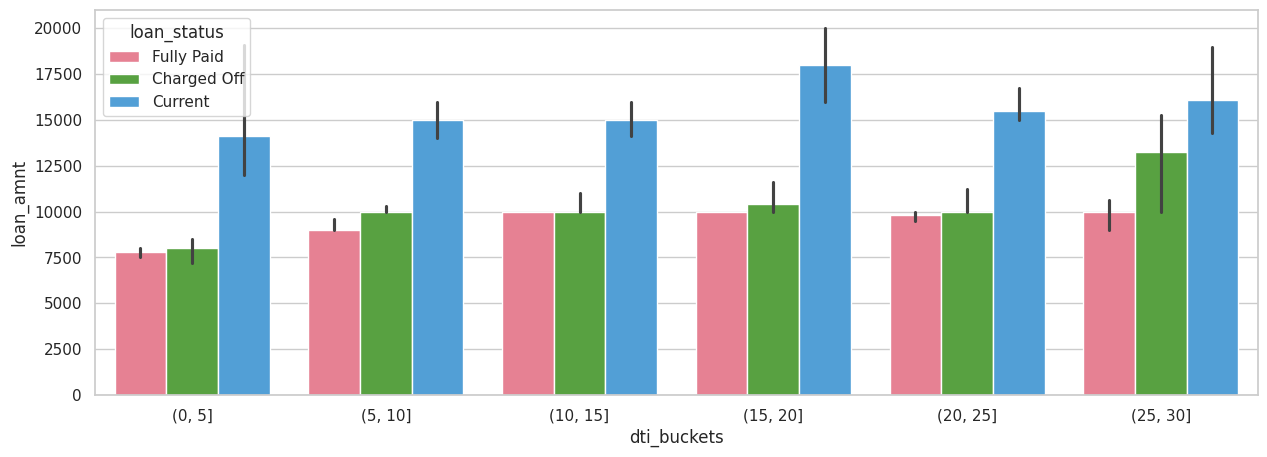

In [53]:
#loan_amnt vs dti vs loan_status
sns.barplot(x='dti_buckets', y='loan_amnt', hue="loan_status", data=df,estimator= np.median)

plt.show()

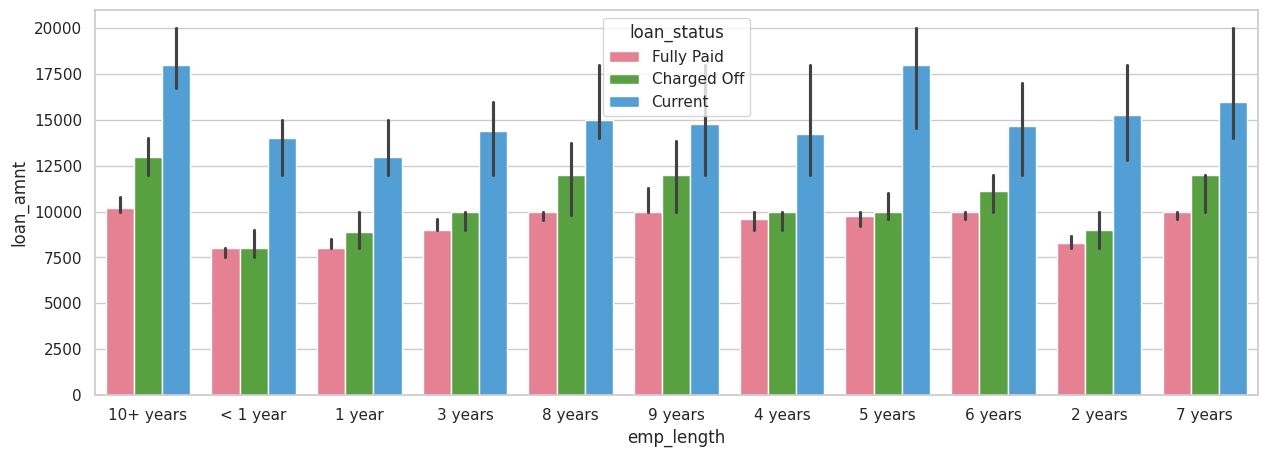

In [54]:
#loan_amnt vs emp_length vs loan_status
sns.barplot(x='emp_length', y='loan_amnt', hue="loan_status", data=df,estimator= np.median)

plt.show()

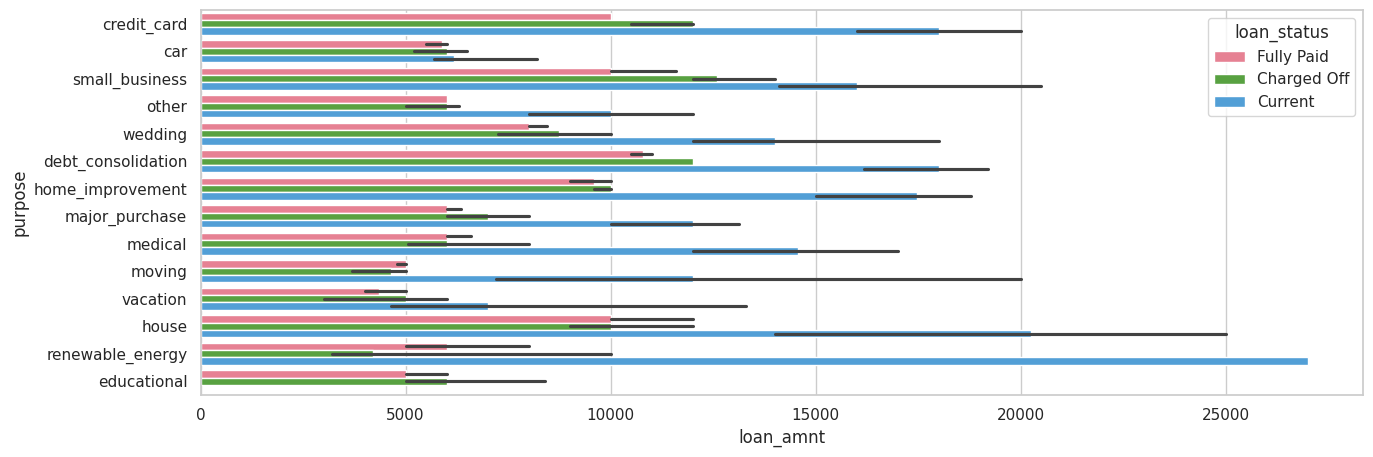

In [55]:
#loan_amnt vs purpose vs loan_status
sns.barplot(y='purpose', x='loan_amnt', hue="loan_status", data=df,estimator= np.median,orient='h')

plt.show()

<ipython-input-56-59dc67f9a979>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['dti_buckets'])['loan_status'].count().plot.bar()


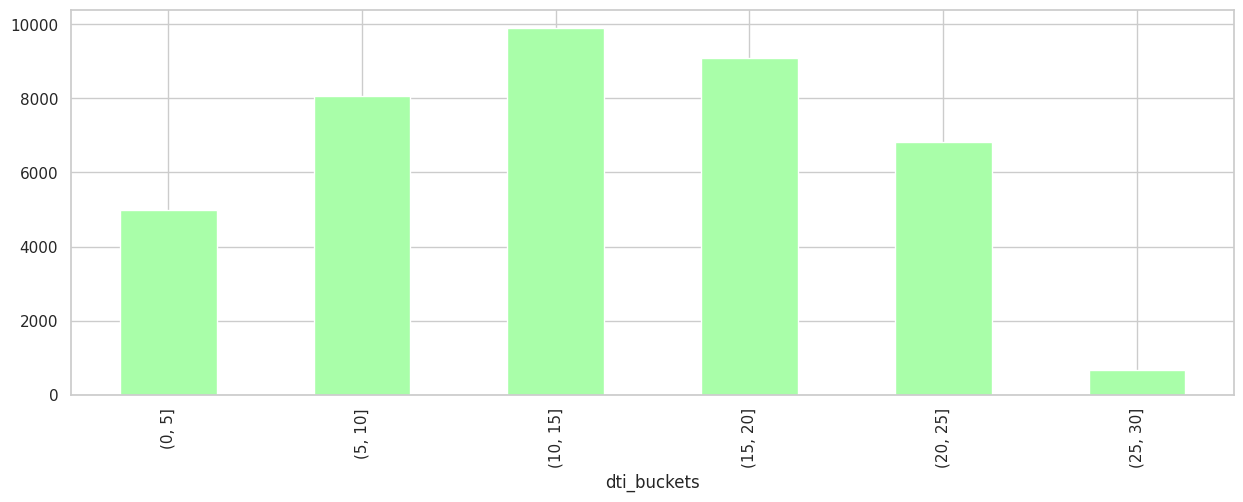

In [56]:
#Customers having a debt to income ratio between 10-15 are the most defaulters
df.groupby(['dti_buckets'])['loan_status'].count().plot.bar()
plt.show()

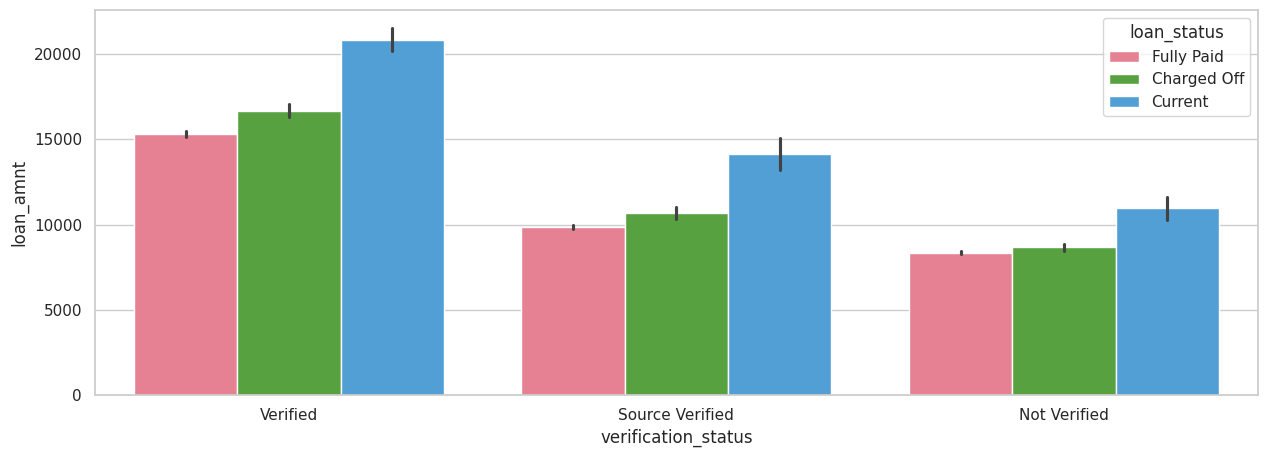

In [57]:
#loan_amnt vs verification_status vs loan_status
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.mean)
plt.show()

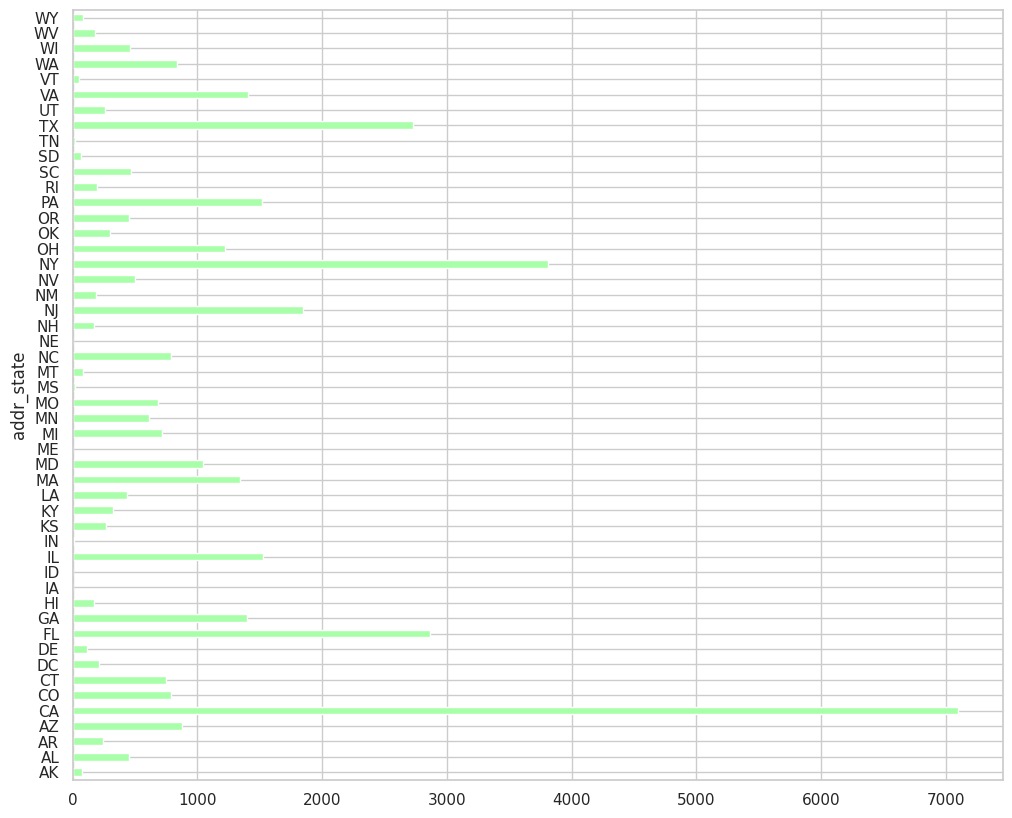

In [58]:
#From the below plot, we can find the top cities who have taken the highest number of loans
#Here the top borrowing cities being California(CA), NewYork(NY), Florida(FL) and Texas(TX)
plt.figure(figsize=(12,10))
df.groupby('addr_state')['loan_status'].count().plot.barh()
plt.show()

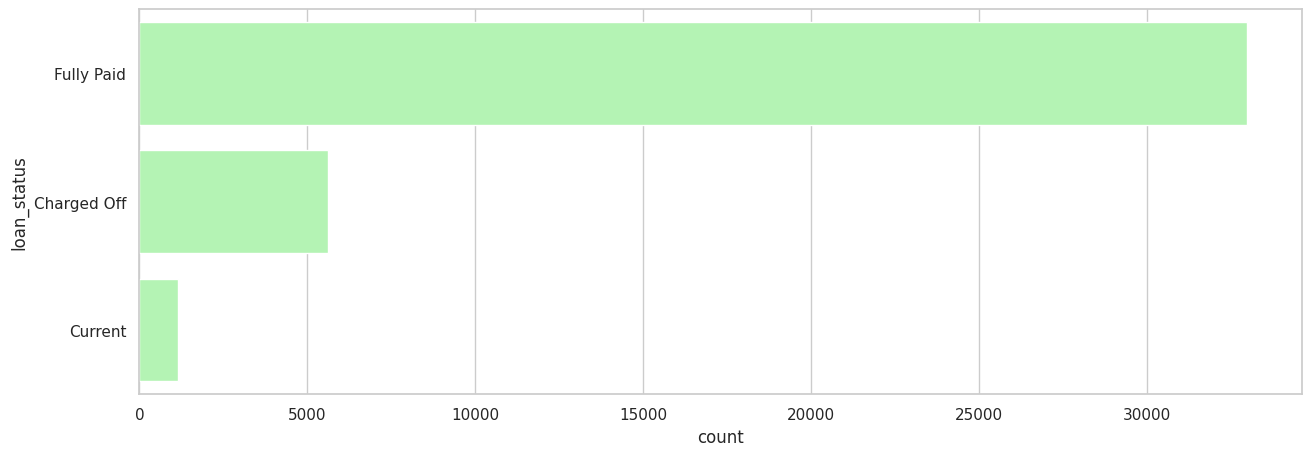

In [59]:
#Most of the borrowers have been able to fully repay their loans
sns.countplot(df['loan_status'])
plt.show()


<Axes: xlabel='home_ownership', ylabel='loan_status'>

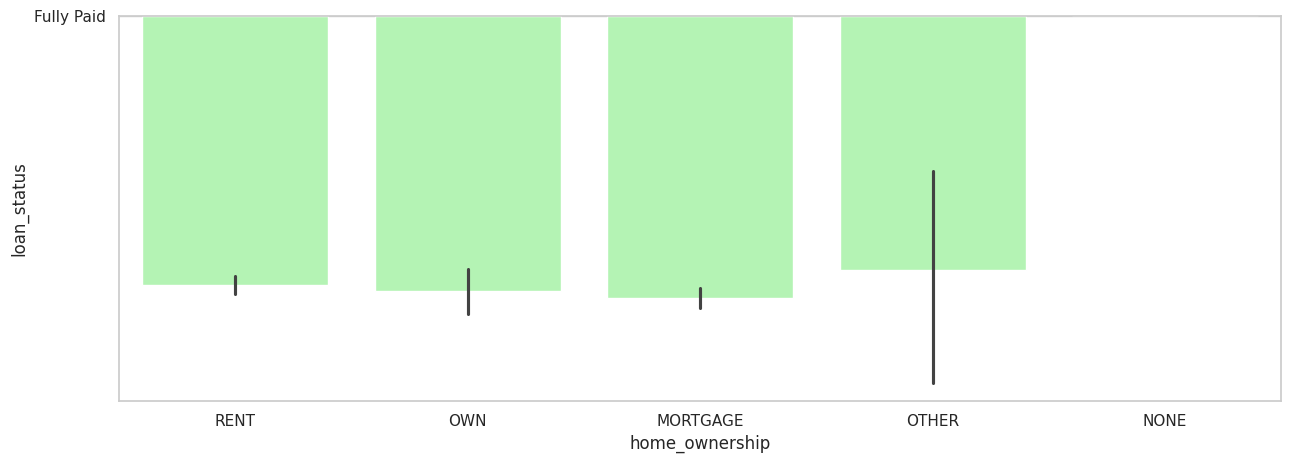

In [60]:

sns.barplot(x='home_ownership',y='loan_status',data=df)